# Step 1: Importing Required Libraries..

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 2: Dataset Loading & Preprocessing

In [2]:
dataset = pd.read_csv('groceries.csv', sep=";", header= None)

# when we set header=None it will consider as csv file which has no header.

In [3]:
dataset.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


for above output:

* Each row is one transction.

* Products in each row is nothing but items purchased by buyer/customer.

 ### Finding out all unique items available at grocery.

In [4]:
unique_items_list = []

# for each index it will iter row by row
for index, row in dataset.iterrows():  
    
    # splitting items with , and creating a new list for row & it will going add it agian 
    # ...item_series list for each iteration..so item_series will be list of lists..
    items_series = list(row.str.split(','))
    
    
    # agian reading each list elements from item_Series which is big list as mentioned above code
    for each_row_list in items_series:
        
        # iterating each item from each_row_lists
        for item in each_row_list:
            
            # for first iteration..unique_items_list is empty so first item directly append to it.
            #...from next onwards..it will start to check condition 'not in'
            #....& if item not found in unique_items_list list then it will append to it.
            #......finally we will get one unique item list..
            if item not in unique_items_list:
                unique_items_list.append(item)

 ### Now, Generating empty Dataframe with unique_items_list elements as column names.

In [5]:
df_apriori = pd.DataFrame(columns=unique_items_list)

In [6]:
df_apriori

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products


In [7]:
dataset1 =df_apriori.copy()

 ### Sorting items from main dataset agian & assigning in respective column. 

In [8]:
## If for the item names obesrved w.r.t. each list will be assigned as number 1 & those items are not in 
##...row number iterating will be assigned with nuber 0.

for index, row in dataset.iterrows():
    items = str(row[0]).split(',')
    one_hot_encoding = np.zeros(len(unique_items_list),dtype=int)
    for item_name in items:
        for i,column in enumerate(dataset1.columns):
            if item_name == column:
                one_hot_encoding[i] = 1
    dataset1.at[index] = one_hot_encoding

# Transction encoder is fastest method to do all this.

In [9]:
dataset1.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# shape of the dataset1

dataset1.shape

(9835, 169)

In [11]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 9834
Columns: 169 entries, citrus fruit to preservation products
dtypes: object(169)
memory usage: 13.1+ MB


In [12]:
# Sinced efault datatype saved as 'object'. Converting in 'integer' datatype

dataset1 = dataset1.astype('uint8')
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 9834
Columns: 169 entries, citrus fruit to preservation products
dtypes: uint8(169)
memory usage: 2.0 MB


# Step 3: EDA

In [13]:
dataset1.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


 ### Checking for Purchased and not purchased item qty. details to get insights

In [14]:
zero =[]
one = []
for i in df_apriori.columns:
    zero.append(list(dataset1[i].value_counts())[0])
    one.append(list(dataset1[i].value_counts())[1])

In [15]:
count_df = pd.DataFrame([zero,one], columns=df_apriori.copy().columns)

In [16]:
count_df.head()

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,9021,9661,9259,9817,8803,8463,9264,7322,9091,9445,...,9834,9812,9812,9827,9823,9831,9810,9834,9831,9833
1,814,174,576,18,1032,1372,571,2513,744,390,...,1,23,23,8,12,4,25,1,4,2


In [17]:
# Changing row names...

count_df.index = ['Not_Purchased', 'Purchased']
count_df

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
Not_Purchased,9021,9661,9259,9817,8803,8463,9264,7322,9091,9445,...,9834,9812,9812,9827,9823,9831,9810,9834,9831,9833
Purchased,814,174,576,18,1032,1372,571,2513,744,390,...,1,23,23,8,12,4,25,1,4,2


Grocery shop contains total 169 numbers of items.

In [18]:
# CHECKING WHICH PRODUCTE

print('maximum purchased item:',count_df.idxmax(axis = 1)[1],':',count_df.loc['Purchased'].max())
print('minimum purchased item:',count_df.idxmax(axis = 1)[0],':',count_df.loc['Not_Purchased'].max())

maximum purchased item: whole milk : 2513
minimum purchased item: baby food : 9834


In [19]:
# Simplest way to sort elements..

sorted_df = pd.DataFrame(count_df.sort_values(by=['Purchased'],axis=1,ascending=False).transpose())
sorted_df.head(20)

,Not_Purchased,Purchased
whole milk,7322,2513
other vegetables,7932,1903
rolls/buns,8026,1809
soda,8120,1715
yogurt,8463,1372
bottled water,8748,1087
root vegetables,8763,1072
tropical fruit,8803,1032
shopping bags,8866,969
sausage,8911,924


In [20]:
# adding Purchased% table into the dataset1.

sorted_df['Purchased%']= sorted_df.Purchased/sum(sorted_df.Purchased)
sorted_df.head()

,Not_Purchased,Purchased,Purchased%
whole milk,7322,2513,0.057947
other vegetables,7932,1903,0.043881
rolls/buns,8026,1809,0.041714
soda,8120,1715,0.039546
yogurt,8463,1372,0.031637


In [21]:
# Finding out avergae of the total purchased% so that we get idea about min_support value setting.

np.mean(sorted_df['Purchased%'])

0.005917159763313616

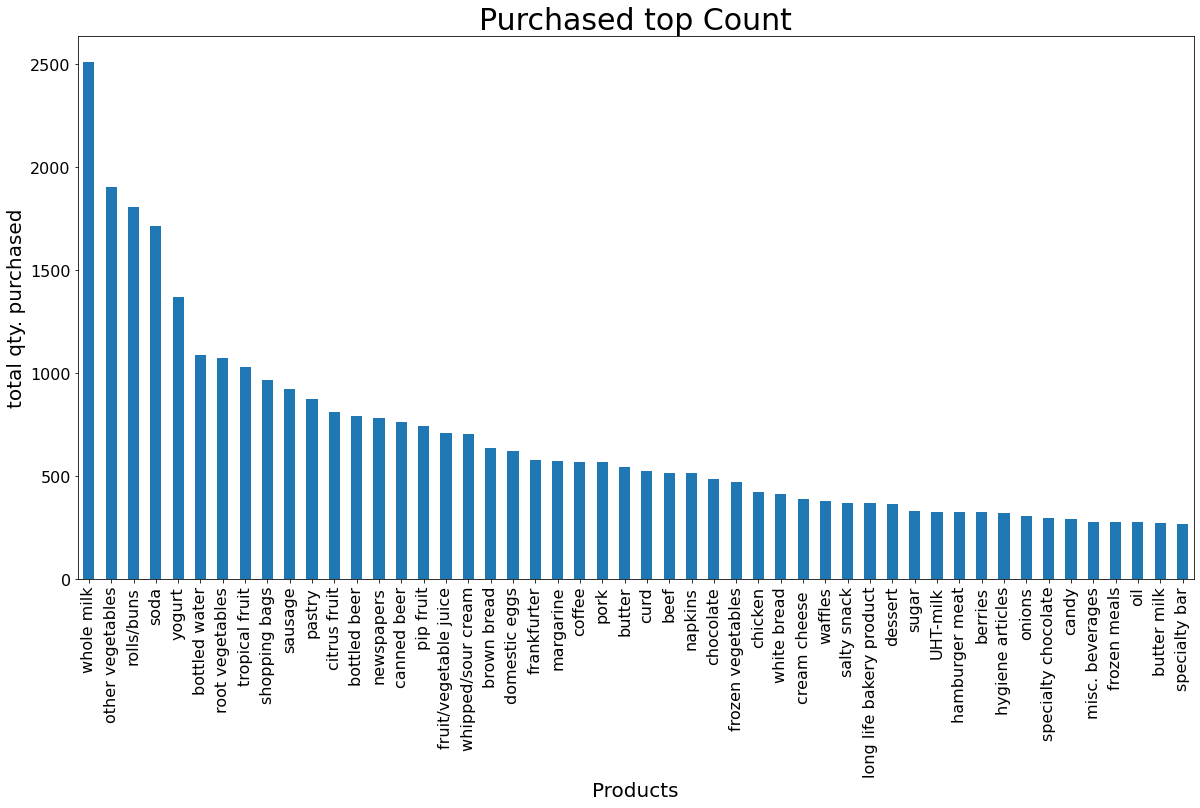

In [22]:
# Plotting sorted top purchased products..

fig = plt.subplots(figsize=(20,10))
purchased = sorted_df.head(50).xs('Purchased' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
plt.title('Purchased top Count',fontsize=30)
plt.xlabel('Products', fontsize=20)
plt.ylabel('total qty. purchased', fontsize=20)
plt.show()

 ### People purchased more is daily need items & transction for all them is above 1000 nos.

'whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt','bottled water', 'root vegetables', 'tropical fruit'

# Step 4: Apriori Rule
***

ref. used: https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html

## 4.1 Measure 1: Support 
***

 #### Concept:

![](https://github.com/ShrikantUppin/Association_Rules/blob/main/measure1_formula.png?raw=true)

<img src="https://github.com/ShrikantUppin/Association_Rules/blob/main/measure1.png?raw=true" width="300" height="300">


 This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.


***

 ### Finding out support for each possible products or diff. product sets present in transction dataframe(dataset1)

In [41]:
from mlxtend.frequent_patterns import apriori, association_rules

freq_items = apriori(dataset1, min_support=0.02, use_colnames=True, max_len=5)

# min_support value can be choose by the user/business need
# max_len is item combinations..here i have taken as 5. total items in combination formed should not be more than 5

In [24]:
freq_items.shape

(122, 2)

<p algin='justify'> This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.</p> 

For example:

In Table sorted_df, the support of {whole milk} is 2513 out of total 9835 row tranctions. i.e. 25.55%. 


Itemsets can also contain multiple items. For instance, the support of {bottled water, soda} is 285 out of 9835, or 2.89%

In [25]:
# checking first 10 rows

freq_items.head(10)

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.104931,(tropical fruit)
3,0.139502,(yogurt)
4,0.058058,(coffee)
5,0.255516,(whole milk)
6,0.075648,(pip fruit)
7,0.039654,(cream cheese )
8,0.193493,(other vegetables)
9,0.037417,(long life bakery product)


In [26]:
# checking last 10 rows 

freq_items.tail(10)

,support,itemsets
112,0.038332,"(soda, rolls/buns)"
113,0.020946,"(pastry, rolls/buns)"
114,0.024301,"(root vegetables, rolls/buns)"
115,0.030605,"(sausage, rolls/buns)"
116,0.028978,"(bottled water, soda)"
117,0.021047,"(pastry, soda)"
118,0.024301,"(sausage, soda)"
119,0.024606,"(soda, shopping bags)"
120,0.022267,"(whole milk, other vegetables, yogurt)"
121,0.023183,"(whole milk, root vegetables, other vegetables)"


If you discover that sales of items beyond a certain proportion tend to have a significant impact on your profits, you might consider using that proportion as your support threshold. You may then identify itemsets with support values above this threshold as significant itemsets.

***
***

## 4.2 Measure 2: Confidence
***
***

 #### Concept:

 This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.



<img src="https://github.com/ShrikantUppin/Association_Rules/blob/main/measure2.png?raw=true" >

***
* Drawbacks of Confidence measure:
***

* it might misrepresent the importance of an association. 

* This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. 


Note: To account for the base popularity of both constituent items, we use a third measure called lift.

 ### Building Association rules using confidence metrics.

In [44]:
# for this we need support value dataframe..that is fre_items from measure1.

confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)

# min_threshold is nothing but setting min % crieteria. In this case i have choosen 20% 
#...confidence should be minimum 20%.

In [45]:
# checking combination in first 10 rows from dataset

confidence_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
1,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
2,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674
3,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706
4,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873
5,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594
6,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
7,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
8,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
9,(tropical fruit),(rolls/buns),0.104931,0.183935,0.024606,0.234496,1.274886,0.005305,1.066050


In [29]:
0.028978*100

2.8978

In [30]:
# checking combination in last 10 rows from dataset

confidence_association.tail(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
63,(pastry),(soda),0.088968,0.174377,0.021047,0.236571,1.356665,0.005533,1.081467
64,(sausage),(soda),0.093950,0.174377,0.024301,0.258658,1.483324,0.007918,1.113687
65,(shopping bags),(soda),0.098526,0.174377,0.024606,0.249742,1.432194,0.007425,1.100452
66,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003
67,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511
68,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
69,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
70,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
71,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
72,(root vegetables),"(whole milk, other vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091


 ### Understanding terminologies:
 ***
 
 [Basic Terminology](https://michael.hahsler.net/research/recommender/associationrules.html#:~:text=Leverage%20measures%20the%20difference%20of,expected%20from%20the%20independent%20sells)

 #### 1 . Antecedent and Consequent
 
The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.


 #### 2. antecedent support
 
 It is antecedent support with all transction numbers.
 
 
 #### 3. consequent support

 It is consequent  support with all transction numbers.
 
 
 #### 4. Support:
 
 Here support is considered for antecedent+consequent combination.
 
 
 #### 5. confidence
 
 Confidence is related to 'consequent item' or 'consequent item combination' w.r.t. antecedent item  or item set.
 
 
 #### 6. lift
 
Lift measures how many times more often X and Y occur together than expected if they where statistically independent. Lift is not down-ward closed and does not suffer from the rare item problem.
 
 In short firm possibilities of buying consequent whenever Antecedent item is purchaed by customer
 
 
 #### 7. Leverage
 
 Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.
 
 leverage also can suffer from the rare item problem.
 
 leverage(X -> Y) = P(X and Y) - (P(X)P(Y))
 
 
 #### 8. conviction
 
 conviction(X -> Y) = P(X)P(not Y)/P(X and not Y)=(1-sup(Y))/(1-conf(X -> Y))

Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.


#### 9. Coverage

coverage(X) = P(X) = sup(X)

A simple measure of how often a item set appears in the data set.

## 4.3 Measure 3: Lift 
***

 #### Concept:
    
This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.


<img src="https://github.com/ShrikantUppin/Association_Rules/blob/main/measure3.png?raw=true" >

 ### Building Association rules using confidence metrics.

In [31]:
lift_association = association_rules(freq_items, metric="lift", min_threshold=1)

In [32]:
lift_association.shape

(126, 9)

In [33]:
lift_association.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
1,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
2,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
3,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
4,(other vegetables),(citrus fruit),0.193493,0.082766,0.028876,0.149238,1.803140,0.012862,1.078133
5,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674
6,(whole milk),(margarine),0.255516,0.058566,0.024199,0.094708,1.617098,0.009235,1.039922
7,(margarine),(whole milk),0.058566,0.255516,0.024199,0.413194,1.617098,0.009235,1.268706
8,(yogurt),(tropical fruit),0.139502,0.104931,0.029283,0.209913,2.000475,0.014645,1.132873
9,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594


In [34]:
lift_association.tail(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
121,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
122,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
123,(whole milk),"(root vegetables, other vegetables)",0.255516,0.047382,0.023183,0.090728,1.914833,0.011076,1.047672
124,(root vegetables),"(whole milk, other vegetables)",0.108998,0.074835,0.023183,0.212687,2.842082,0.015026,1.175091
125,(other vegetables),"(whole milk, root vegetables)",0.193493,0.048907,0.023183,0.119811,2.449770,0.013719,1.080555


## 4.4 Eliminating redudancy sets...
 
 @ Written by Shrikant Uppin.(by me). Easy & Simple tech. codeless

In [35]:
# As per above output observation, it is clear that when same items repeated..
#...(for ex: in first row: A-->B, and in next row B-->A) gives same leverage & lift but confidence is different.
#...this is known as redudency when same item set shuffled as ancedents & consequent.
#.... so to eliminates in easist way..will sort n the basis of leverage & confidence.

redundancy = lift_association.sort_values(by=['leverage','confidence'],axis=0, ascending=False).reset_index()
redundancy = redundancy.drop(['index'], axis=1)
redundancy.shape
redundancy.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
1,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
3,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
4,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


In [36]:
redundancy.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
121,(other vegetables),(bottled water),0.193493,0.110524,0.024809,0.128219,1.160101,0.003424,1.020297
122,(yogurt),(soda),0.139502,0.174377,0.027351,0.196064,1.124368,0.003025,1.026976
123,(soda),(yogurt),0.174377,0.139502,0.027351,0.156851,1.124368,0.003025,1.020577
124,(tropical fruit),(soda),0.104931,0.174377,0.020844,0.198643,1.139159,0.002546,1.030281
125,(soda),(tropical fruit),0.174377,0.104931,0.020844,0.119534,1.139159,0.002546,1.016585


In [37]:
# Now check output of above cells, when leverage and lift are same for consequent rows..then compare with the value of confidence
#...if confidence of middle cell found less than two side cells..drop it.
# dropping odd index rows..since it contains less confidence
# ultimately this will help us to elminate repeated combination..which has low lift & confidence..

unique_rules = redundancy.iloc[::2]
unique_rules.shape

(63, 9)

In [40]:
unique_rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
2,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
4,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
6,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
8,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
10,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
12,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
14,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
16,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
18,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594


 ### Summary:
 
 
 * freq_items = apriori(dataset1, min_support=0.02, use_colnames=True, max_len=5)
 
 

 * confidence_association = association_rules(freq_items, metric='confidence', min_threshold=0.2)
 
 
 * lift_association = association_rules(freq_items, metric="lift", min_threshold=1)
 

# Step 5: Generated Rules analysis/Processing

We have obtained unique_rules with metric='lift'. Now, this unique_rules dataframe will be used for analysis..just filtering as per threshold value set/required & obtaining diff. pairs of item sets.


Note: lift is set to 1. in previous code. Since if lift is equal to or greater than 1..that means chances to pick consequents items by customer is more..!!

In [71]:
top_20 = unique_rules[unique_rules['lift']>1.5]

 ### Top 20 combinations w.r.t. Lift more than 1.5

In [155]:
top_20_sort = top_20.sort_values(by='lift', ascending=False)
top_20_sort.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
34,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392
24,"(whole milk, root vegetables)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
0,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
36,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003
16,(whipped/sour cream),(other vegetables),0.071683,0.193493,0.028876,0.402837,2.081924,0.015006,1.350565
48,(whipped/sour cream),(yogurt),0.071683,0.139502,0.020742,0.289362,2.074251,0.010742,1.210881
40,"(whole milk, yogurt)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511
42,"(other vegetables, yogurt)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
18,(tropical fruit),(yogurt),0.104931,0.139502,0.029283,0.279070,2.000475,0.014645,1.193594


 ### Unique item names from to 20 lift combinations..

In [169]:
x = top_20_sort[['antecedents','consequents']]

In [170]:
item_list = []
for i in x.antecedents.to_list():
    for j in list(set(i)):
        item_list .append(j)

In [171]:
for p in x.consequents.to_list():
    for q in list(set(p)):
        item_list.append(q)

In [172]:
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    top_items =[]
    for m in unique_list:
        top_items.append(m)
    print(top_items)

In [173]:
unique(item_list)

['pip fruit', 'yogurt', 'margarine', 'root vegetables', 'soda', 'rolls/buns', 'tropical fruit', 'curd', 'whipped/sour cream', 'other vegetables', 'pork', 'beef', 'bottled water', 'butter', 'sausage', 'citrus fruit', 'frozen vegetables', 'domestic eggs', 'fruit/vegetable juice', 'whole milk', 'brown bread']


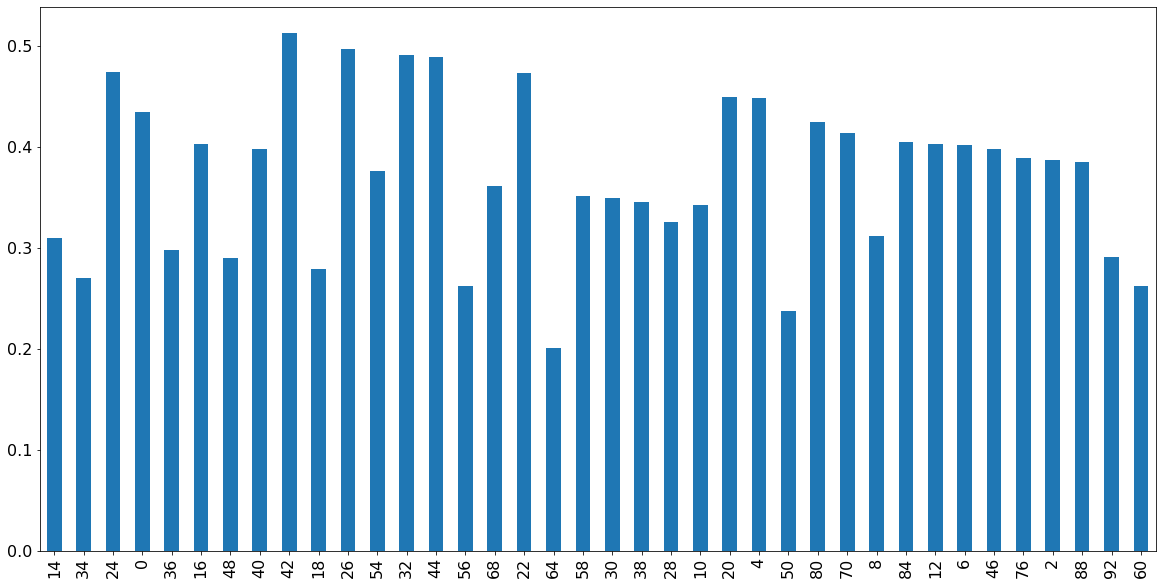

In [175]:
# Plotting sorted top purchased products..

fig = plt.subplots(figsize=(20,10))
purchased = top_20_sort.head(50).xs('confidence' ,axis = 1)
purchased.plot(kind='bar',fontsize=16)
#plt.title('Purchased top Count',fontsize=30)
#plt.xlabel('Products', fontsize=20)
#plt.ylabel('total qty. purchased', fontsize=20)
plt.show()